In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix


# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

df = pd.read_csv("../Files/cleaned_feature.csv")
print(df)
# --------------------------------------------------------------
# Create a training and test set
# --------------------------------------------------------------
df_train = df.drop(["participant","category","set"], axis=1)
# df_train['label'] = df_train['label'].astype("float")

x = df_train.drop("label",axis=1)
x = df_train.drop("epoch (ms)",axis=1)
y = df_train["label"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=42, stratify=y)



                   epoch (ms)  index     acc_x     acc_y     acc_z      gyr_x  \
0     2019-01-11 15:08:08.000     14 -0.172350  0.910389 -0.168556 -27.895242   
1     2019-01-11 15:08:08.400     16 -0.024777  0.857553 -0.059254  -2.040040   
2     2019-01-11 15:08:08.800     18 -0.063378  1.003152 -0.033869   1.164754   
3     2019-01-11 15:08:09.200     20 -0.044993  0.959326 -0.038011   2.469483   
4     2019-01-11 15:08:09.600     22 -0.046925  0.936665 -0.056463   8.471911   
...                       ...    ...       ...       ...       ...        ...   
3863  2019-01-20 17:33:26.200   9000  0.063910 -0.952114  0.107673 -38.792016   
3864  2019-01-20 17:33:26.600   9002 -0.024266 -1.193314 -0.109309  -2.783290   
3865  2019-01-20 17:33:27.000   9004 -0.043276 -0.988153 -0.062545   2.032956   
3866  2019-01-20 17:33:27.400   9006 -0.048048 -1.044737 -0.065951  -0.043109   
3867  2019-01-20 17:33:27.800   9008 -0.044005 -1.035004 -0.059316   1.105070   

          gyr_y    gyr_z pa

In [3]:
# --------------------------------------------------------------
# Split feature subsets
# --------------------------------------------------------------
basic_features = ["acc_x","acc_y","acc_z","gyr_x","gyr_y","gyr_z"]
sqaure_features = ["acc_r","gyr_r"]
pca_features = ["pca_1","pca_2","pca_3"]
time_features = [f for f in df_train.columns if "_temp_" in f]
frequency_features = [f for f in df_train.columns if ("_freq" in f) or ("_pse" in f)]
cluster_features = ["cluster"]

print("Basic features :", len(basic_features))
print("Sqaure features :", len(sqaure_features))
print("Pca features :", len(pca_features))
print("Time features :", len(time_features))
print("Freaquency features :", len(frequency_features))
print("Cluster features :", len(cluster_features))

feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + sqaure_features + pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + frequency_features + cluster_features))

Basic features : 6
Sqaure features : 2
Pca features : 3
Time features : 14
Freaquency features : 77
Cluster features : 1


In [7]:
# --------------------------------------------------------------
# Perform forward feature selection using simple decision tree
# --------------------------------------------------------------

leaner = ClassificationAlgorithms()

max_features = 10

selected_festures, ordered_features, ordered_scores = leaner.forward_selection(max_features,x_train,y_train)


0


ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ANACONDA\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "d:\ANACONDA\Lib\site-packages\sklearn\tree\_classes.py", line 186, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "d:\ANACONDA\Lib\site-packages\sklearn\base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ANACONDA\Lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ANACONDA\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'ohp'

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ANACONDA\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "d:\ANACONDA\Lib\site-packages\sklearn\tree\_classes.py", line 186, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "d:\ANACONDA\Lib\site-packages\sklearn\base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ANACONDA\Lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ANACONDA\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'row'


In [9]:
selected_festures = [
    "acc_z_freq_0.0_Hz_ws_14",
    "acc_x_freq_0.0_Hz_ws_14",
    "gyr_r_pse",
    "acc_y_freq_0.0_Hz_ws_14",
    "gyr_r_freq_1.071_Hz_ws_14",
    "gyr_x_freq_1.071_Hz_ws_14",
    "acc_x_max_freq",
]

possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_festures,
]

feature_names = [
    "Feature set 1",
    "Feature set 2",
    "Feature set 3",
    "Feature set 4",
    "Selected features",
]

learner = ClassificationAlgorithms()
iterations = 1
score_df = pd.DataFrame()
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = x_train[possible_feature_sets[i]]
    selected_test_X = x_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


In [11]:
# --------------------------------------------------------------
# Create a grouped bar plot to compare the results
# --------------------------------------------------------------
score_df.sort_values(by="accuracy", ascending=False)



,model,feature_set,accuracy
1,RF,Feature set 4,0.992761
0,NN,Feature set 4,0.986556
1,RF,Feature set 3,0.984488
0,NN,Feature set 3,0.976215
3,DT,Feature set 4,0.974147
1,RF,Selected features,0.971044
3,DT,Selected features,0.961737
0,NN,Selected features,0.957601
1,RF,Feature set 1,0.949328
1,RF,Feature set 2,0.949328


In [12]:
# --------------------------------------------------------------
# Select best model and evaluate results
# --------------------------------------------------------------
(class_train_y,
class_test_y,
class_train_prob_y,
class_test_prob_y,
) = learner.random_forest(
x_train[feature_set_4], y_train, x_test[feature_set_4], gridsearch=True)



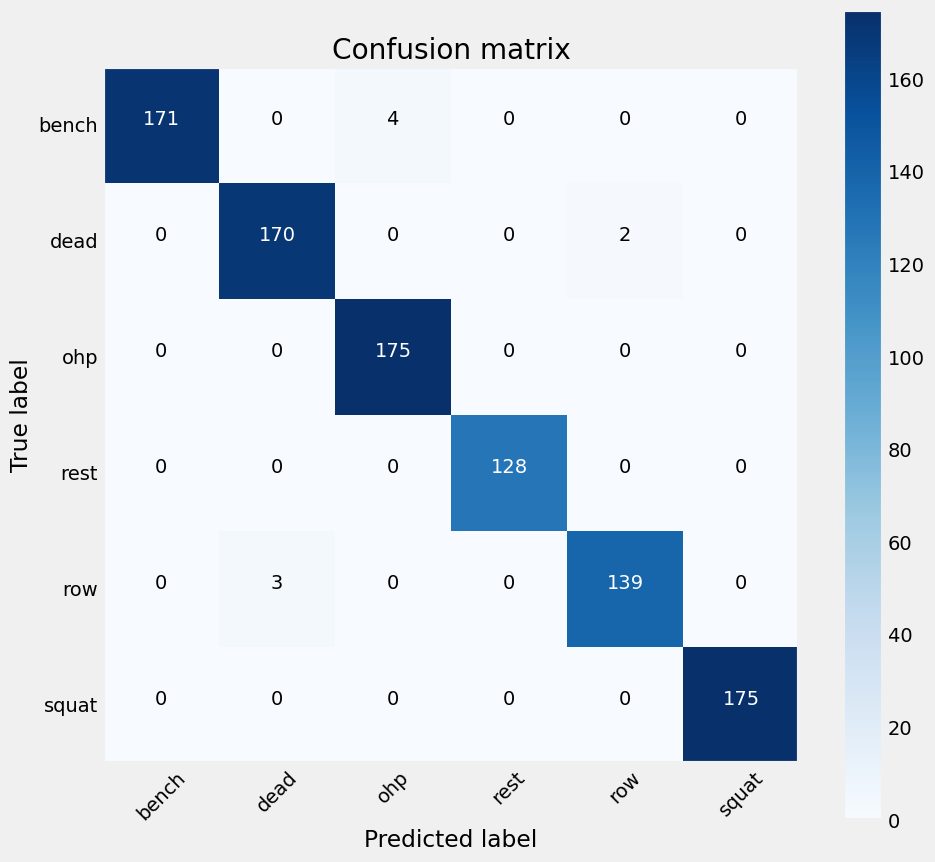

In [16]:
accuracy = accuracy_score(y_test, class_test_y)
accuracy

classes = class_test_prob_y.columns
# print(classes)
cm = confusion_matrix(y_test,class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [27]:
# --------------------------------------------------------------
# Select train and test data based on participant
# --------------------------------------------------------------
particicpant_df = df.drop(["set","category"], axis=1)

x_train = particicpant_df[particicpant_df["participant"] != "A"].drop("label" , axis=1)
y_train = particicpant_df[particicpant_df["participant"] != "A"]["label"]


x_test = particicpant_df[particicpant_df["participant"] == " A"].drop("label" , axis=1)
y_test = particicpant_df[particicpant_df["participant"] == " A"]["label"]

# x_train = x_train.drop(["participant"], axis=1)
# x_test = x_test.drop(["participant"], axis=1)

print(x_test)

                   epoch (ms)  index     acc_x     acc_y     acc_z      gyr_x  \
36    2019-01-11 15:10:11.400    100 -0.013533  0.916607 -0.153791  13.149052   
37    2019-01-11 15:10:11.800    102 -0.103125  0.840104 -0.212726   7.291259   
38    2019-01-11 15:10:12.200    104 -0.114312  1.216864 -0.165049  -7.295151   
39    2019-01-11 15:10:12.600    106 -0.177597  0.956484 -0.201318  10.001542   
40    2019-01-11 15:10:13.000    108 -0.171448  0.943575 -0.211396 -16.687208   
...                       ...    ...       ...       ...       ...        ...   
3470  2019-01-19 17:26:17.800   8116  0.191937 -0.875465  0.459203  20.665332   
3471  2019-01-19 17:26:18.200   8118  0.160796 -0.829827  0.512937 -17.780432   
3472  2019-01-19 17:26:18.600   8120  0.201594 -0.885545  0.518138  -0.946183   
3473  2019-01-19 17:26:19.000   8122  0.225466 -0.890378  0.388270 -18.841831   
3474  2019-01-19 17:26:19.400   8124  0.300957 -0.941963  0.460472   1.049395   

          gyr_y    gyr_z pa

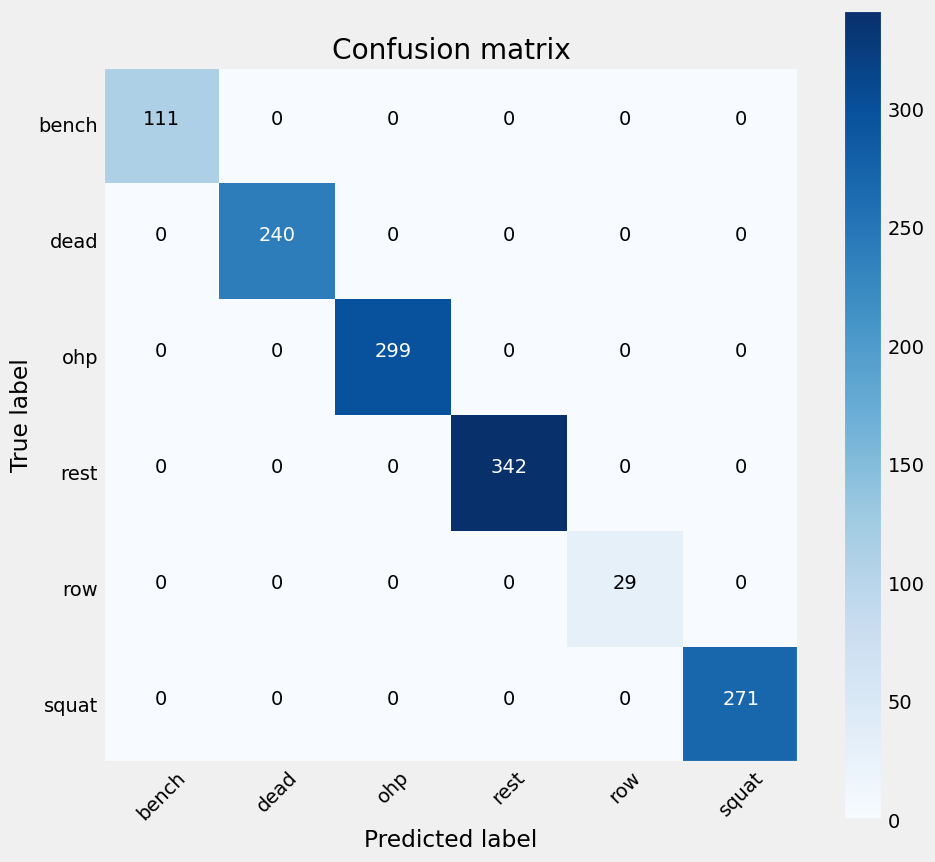

In [28]:
# --------------------------------------------------------------
# Use best model again and evaluate results
# --------------------------------------------------------------
(class_train_y,
class_test_y,
class_train_prob_y,
class_test_prob_y,
) = learner.random_forest(
x_train[feature_set_4], y_train, x_test[feature_set_4], gridsearch=True)

accuracy = accuracy_score(y_test, class_test_y)
accuracy

classes = class_test_prob_y.columns
# print(classes)
cm = confusion_matrix(y_test,class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()



In [ ]:
# --------------------------------------------------------------
# Try a simpler model with the selected features
# --------------------------------------------------------------